# Task 3 : Performing EDA On Sample Superstore Dataset
# Submitted by : Jainil Shah
# You are business manager.As a business manager,you want to find out the weak areas where you can work to make more profit.
## 1. Importing Libraries

In [1]:
# used for working with arrays
import numpy as np 
# it offers data structures and operations for manipulating numerical tables and time series
import pandas as pd 
#  data visualization and graphical plotting
import matplotlib.pyplot as plt
# provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# high-level Python visualization library : wrapper for Plotly.py that exposes a simple syntax for complex charts.

# 2. Importing the dataset

In [2]:
df = pd.read_csv('D://Machine Learning//Task 3 - Dataset.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# 3.Shape of the dataset

In [3]:
# print rows and columns number count
print('Number of rows: ',df.shape[0])
print('Number of columns: ',df.shape[1])

Number of rows:  9994
Number of columns:  13


# 4.column names of table

In [4]:
# gives names of columns
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# 5. Check the attribute types

In [5]:
#check data type of columns/attributes
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

# 6.Check the missing values

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# 7.Check the dataset for duplicate

In [7]:
# gives count of duplicates
df.duplicated().sum()

17

# 8. drop duplicates

In [8]:
# drops duplicates
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# 9.Checking the unique values in columns

In [9]:
# return number of unique elements in the object
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# 10. Correlation

In [10]:
# find the pairwise correlation of all columns in the dataframe
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


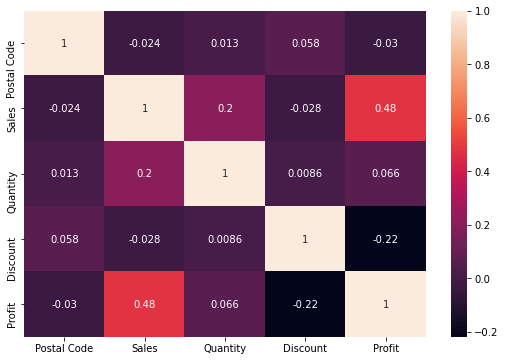

In [11]:
# A correlation heatmap uses colored cells, 
# typically in a monochromatic scale, 
# to show a 2D correlation matrix (table) between two discrete dimensions
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df.corr(), annot= True)
plt.show()

# 11.Covariance

In [12]:
# property of a function of retaining its form when the variables are linearly transformed.: Covariance
# compute pairwise covariance of columns
#  returned data frame is the covariance matrix of the columns of the DataFrame
df.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


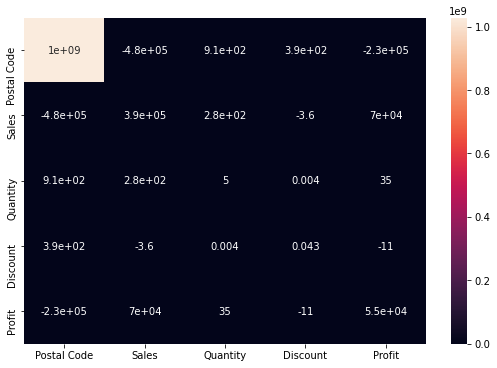

In [13]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df.cov(), annot= True)
plt.show()

# 12.Find the Series containing counts of unique values

In [14]:
# flatten: return a copy of the array collapsed into one dimension
pd.value_counts(df.values.flatten())

United States         9994
Office Supplies       6026
Standard Class        5968
Consumer              5191
0.0                   4863
                      ... 
63.8862                  1
San Luis Obispo          1
-935.9595                1
1931.9579999999999       1
-2.6982                  1
Length: 14022, dtype: int64

# 13.Deleting the Variable

In [15]:
col=['Postal Code']
df1=df.drop(columns=col,axis=1)

# 14.Visualizing the dataset

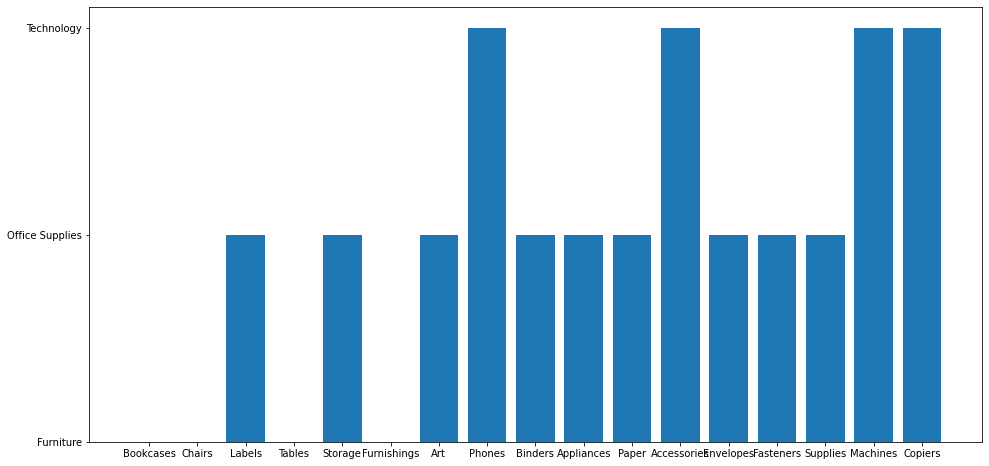

In [16]:
# presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.
# The bars can be plotted vertically or horizontally.
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=df)
plt.show()

In [17]:
print(df1['State'].value_counts())

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

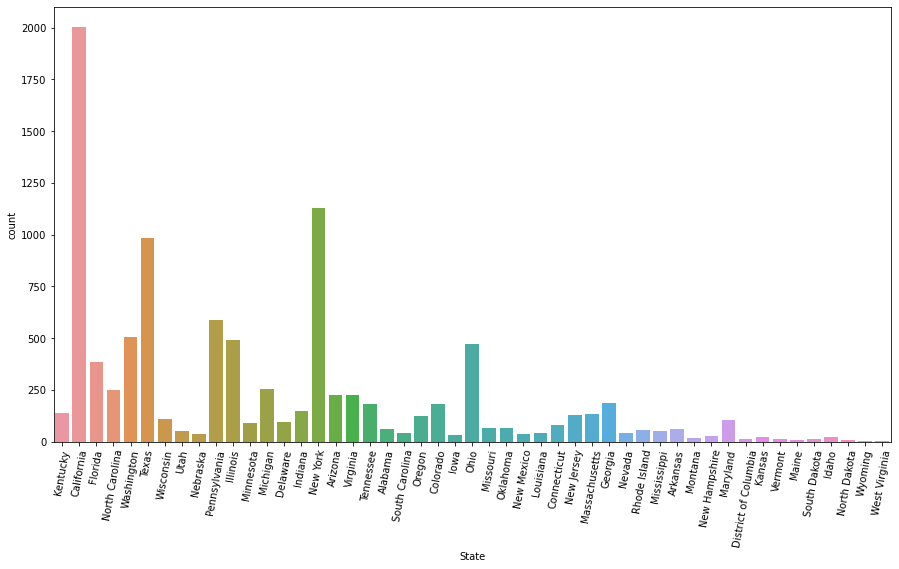

In [18]:
# Show the counts of observations in each categorical bin using bars
plt.figure(figsize=(15,8))
sns.countplot(x=df1['State'])
plt.xticks(rotation=80)
plt.show()


In [19]:
print(df['Sub-Category'].value_counts())

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


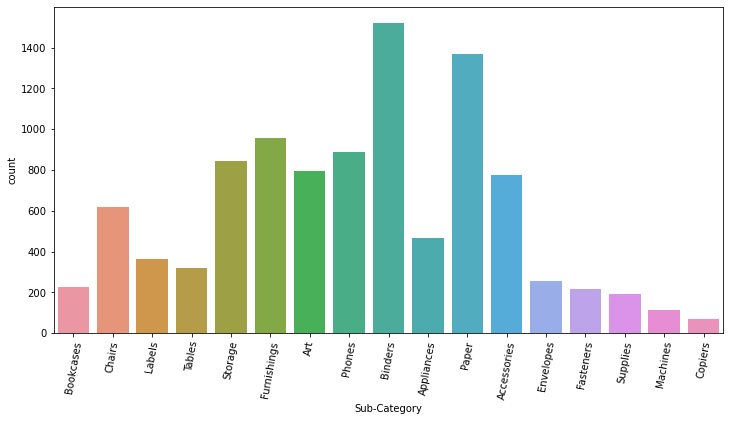

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=80)
plt.show()

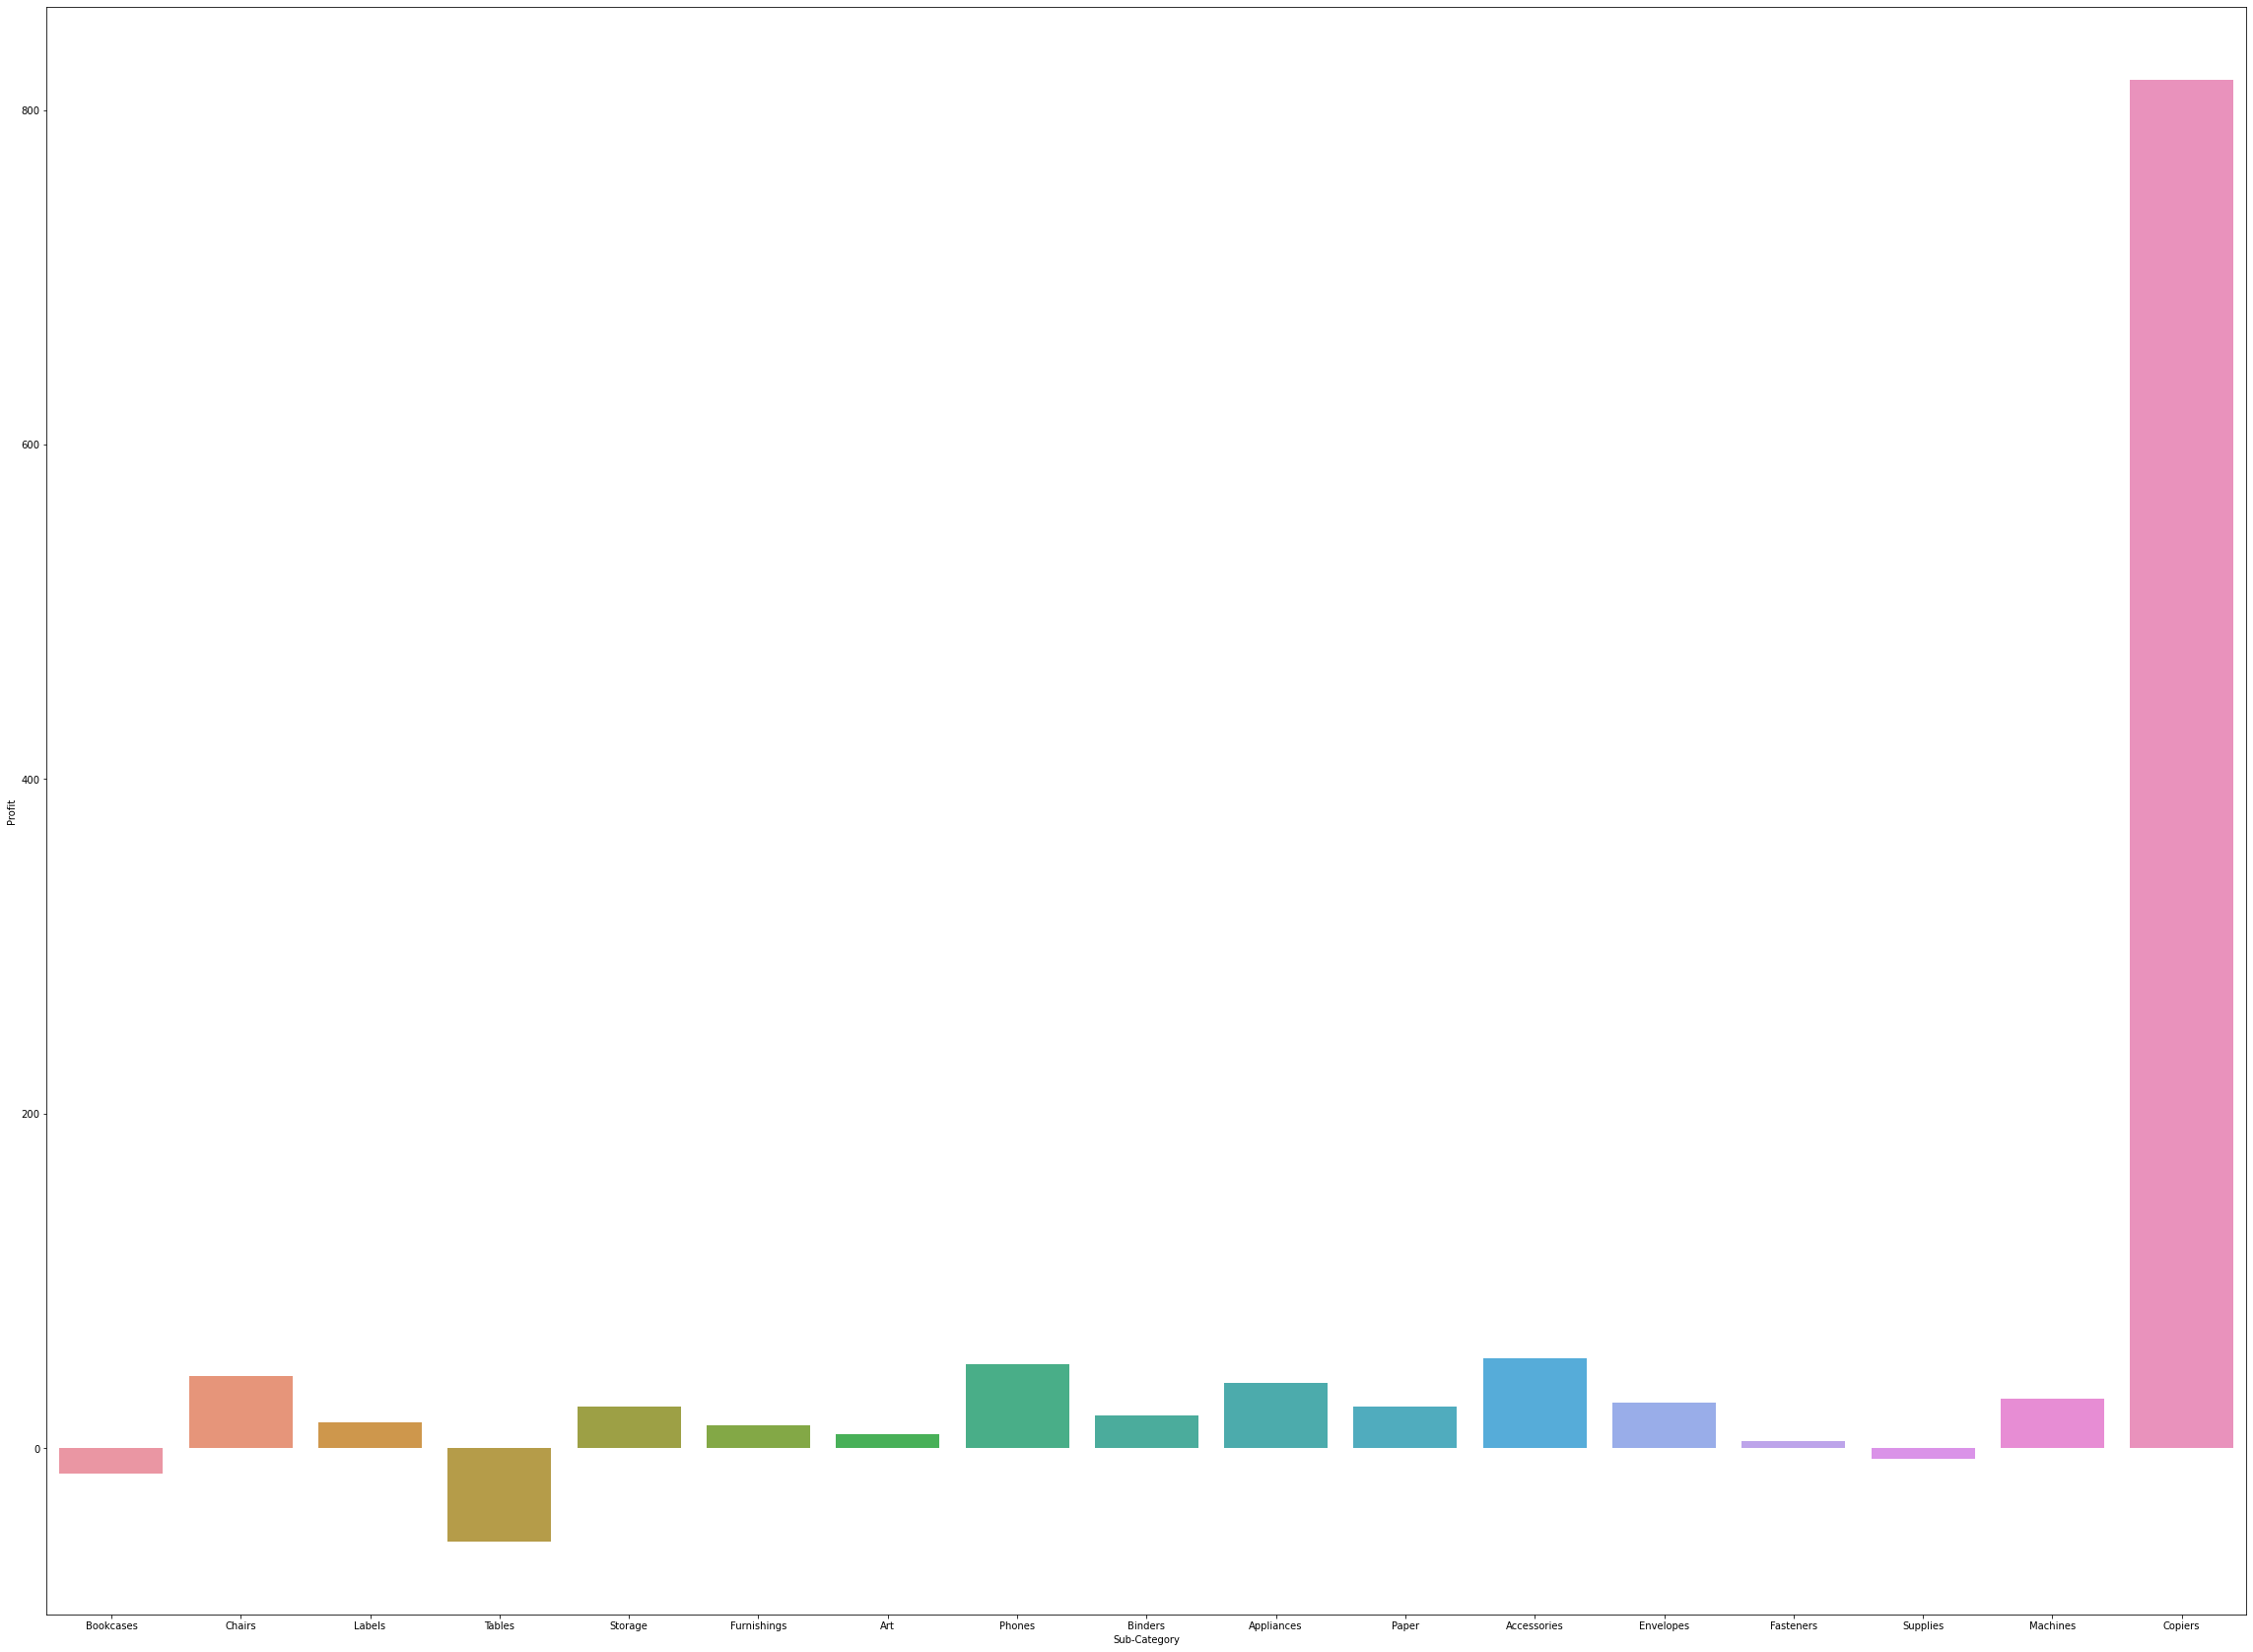

In [21]:
plt.figure(figsize=(40,30))
sns.barplot(x=df['Sub-Category'], y=df['Profit'],ci=False)

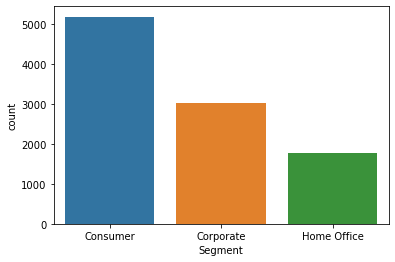

In [22]:
sns.countplot(x=df['Segment'])

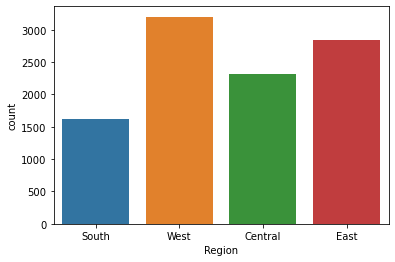

In [23]:
sns.countplot(x=df['Region'])

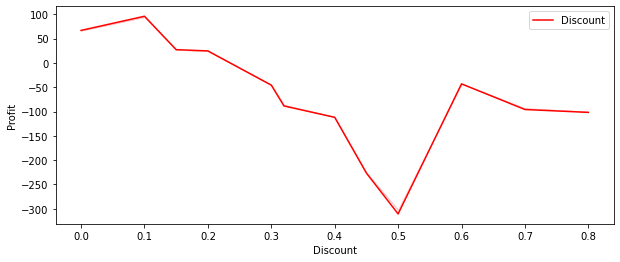

In [24]:
# display numerical values on one axis, and categorical values on the other.
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = df, color = 'r', label= 'Discount',ci=False)
plt.legend()

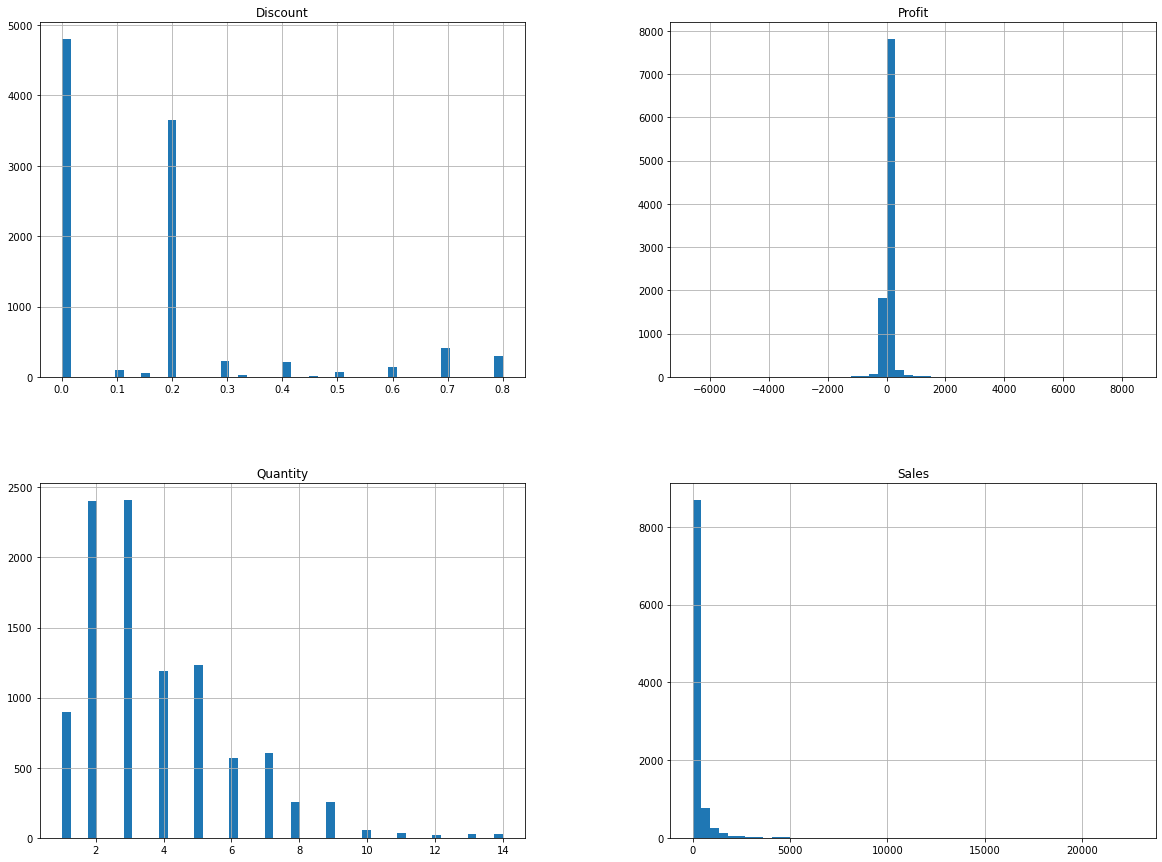

In [25]:
# bins should be the number of bars you want to show in your histogram plot.
df1.hist(bins=50 ,figsize=(20,15))
plt.show()

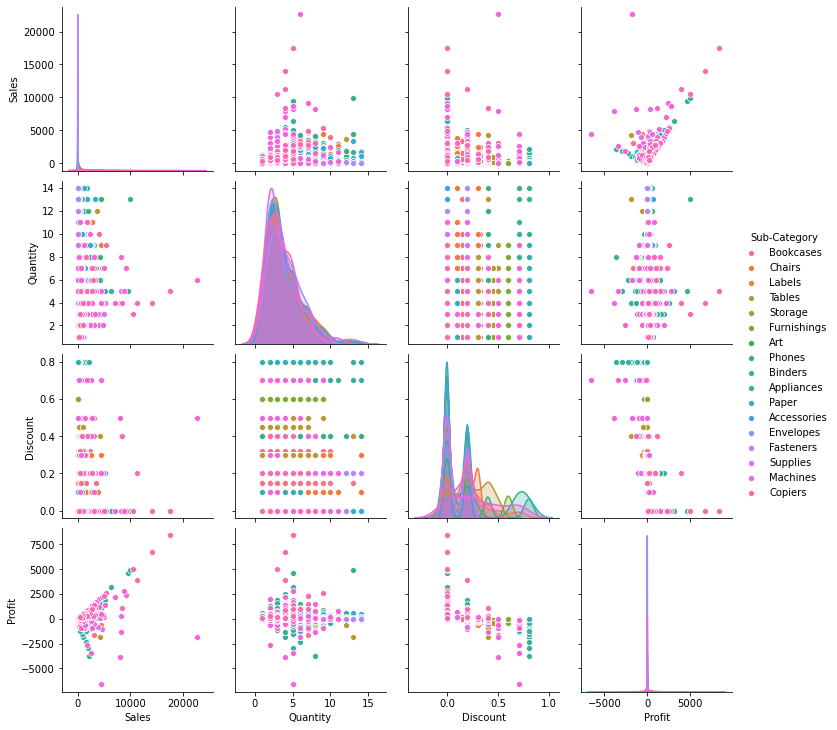

In [26]:
# pairplot plot a pairwise relationships in a dataset
# creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row
# and in the x-axis across a single column.
figsize=(30,30)
sns.pairplot(df1,hue='Sub-Category')

# 16. Now, Grouping or sum the sales ,profit,discount,quantity according to every state of region and also according to sub-categories sales

In [27]:
grouped=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])
                     ['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

<ipython-input-27-170a5b59473d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped=pd.DataFrame(df.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])


,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


# 17.sum,mean,min,max,count median,standard deviation,Variance of each states of Profit

In [28]:
# finding sum,mean,max,min,count,median,std deviation,variance of profit on each state
df.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


# 18.K means Clustering

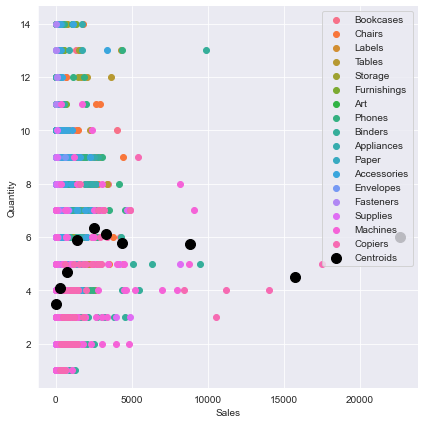

In [29]:
# selected all rows but last 4 columns
x = df.iloc[:, [9, 10, 11, 12]].values
# unsupervised machine learning algorithms that forms clusters of data based on the similarity between data instances
# number of clusters has to be defined beforehand
# K in the K-means refers to the number of clusters.
from sklearn.cluster import KMeans
# within cluster sum of squares
# For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square )
# WCSS is the sum of squared distance between each point and the centroid in a cluster
#  When we plot the WCSS with the K value, the plot looks like an Elbow
# number of clusters increases, the WCSS value will start to decrease
wcss = []
# To get the values used in the graph, we train multiple models using a different number of clusters 
# and storing the value of the intertia_ property (WCSS) every time.
# k-means++ ensures that you get don’t fall into the random initialization trap.
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)
# types: whitegrid,darkgrid,dark,ticks,white
sns.set_style("darkgrid")
# maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset.
sns.FacetGrid(df, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
# centroids are shown using yellow
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

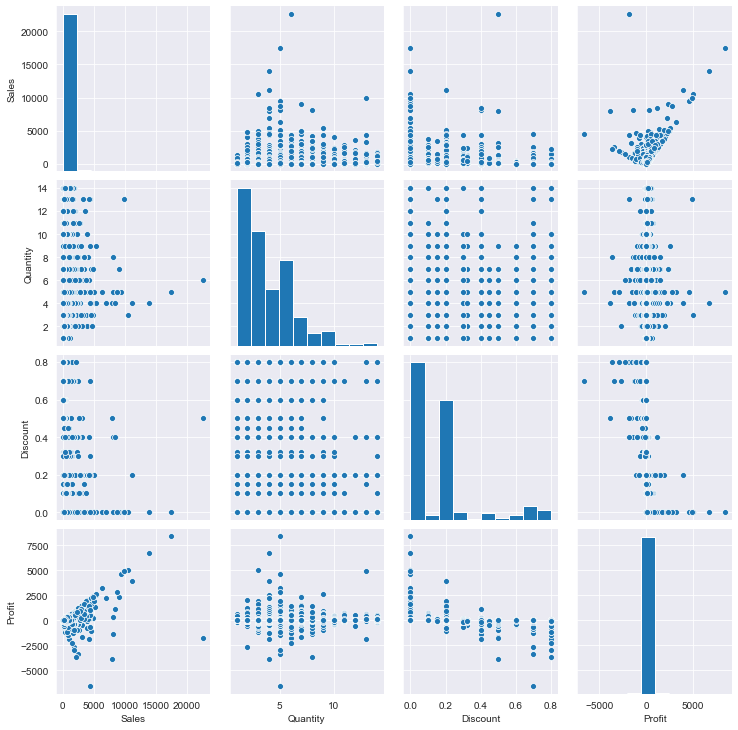

In [30]:
sns.pairplot(df1)

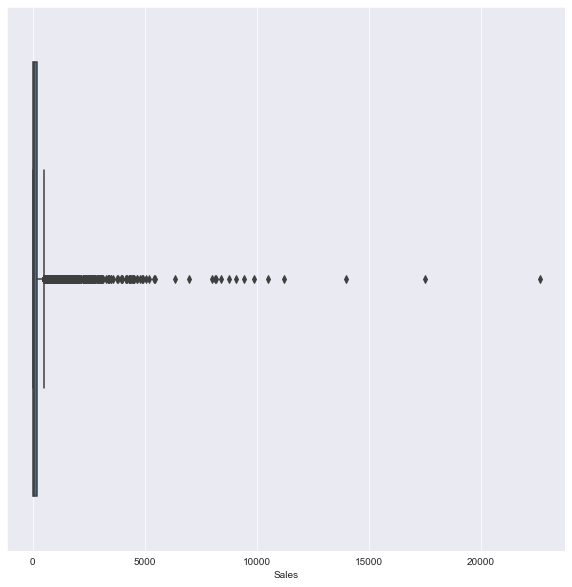

In [31]:
#  depicting groups of numerical data through their quartiles
# used for detect the outlier in data set
#A box plot consist of 5 things.

# a)Minimum
# b)First Quartile or 25%
# c)Median (Second Quartile) or 50%
# d)Third Quartile or 75%
# e)Maximum
fig, axes = plt.subplots(figsize = (10 , 10))
sns.boxplot(df['Sales'])

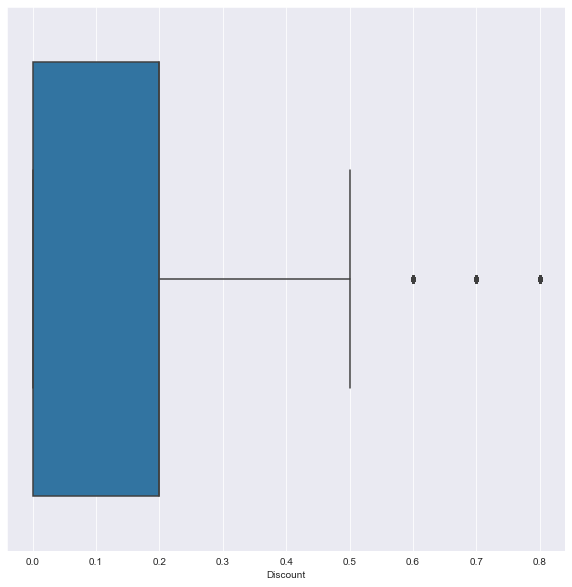

In [32]:
fig, axes = plt.subplots(figsize = (10 , 10))

sns.boxplot(df['Discount'])

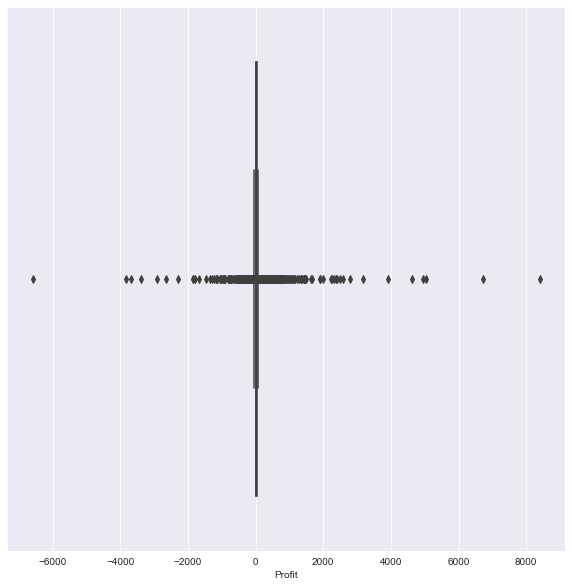

In [33]:
fig, axes = plt.subplots(figsize = (10 , 10))

sns.boxplot(df['Profit'])

In [34]:
# quantile determines how many values in a distribution are above or below a certain limit.
Q1 = df.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')
Q3 = df.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')
IQR = Q3 - Q1

print(IQR)

Postal Code    66785.00000
Sales            192.66000
Quantity           3.00000
Discount           0.20000
Profit            27.63525
dtype: float64


# 19. Plotting scatterplot

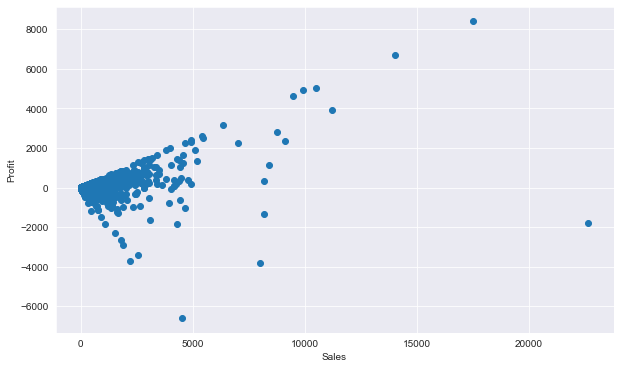

In [35]:
# values of two variables are plotted along two axes, the pattern of the resulting points revealing any correlation present.
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(df["Sales"] , df["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

# 20. Distribution plot

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


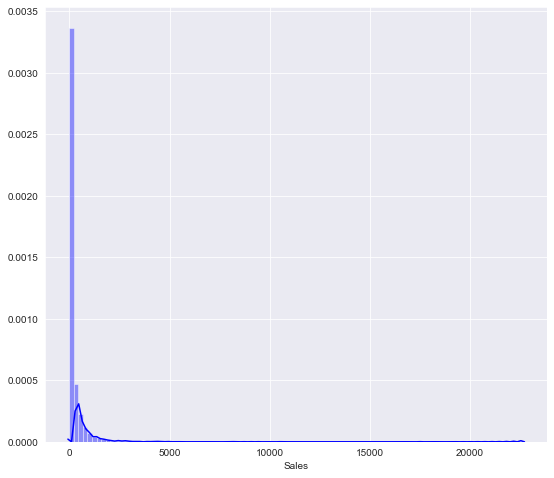

In [36]:
# used for examining univariate and bivariate distributions.
print(df['Sales'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(df['Sales'], color = 'b', bins = 100, hist_kws = {'alpha': 0.4});